<H1><font color='#17202A'>ABC and XYZ Segmentation </font></H1>

ABC analysis is a good fundamental step, but its not adequate to understand the nature of our SKUs.

XYZ analysis is used to analyze the weighting of individual SKUs according to their consumption pattern. Here we calculate the demand fluctuation for each SKU, based on the fluctuation figure we assign three classes X, Y, Z.

To measure the fluctuation we use "Cofficient of variation" or CV

$ cv = \frac{Standard Deviation}{Mean} $


* Class X materials – characterized by a constant, non-changing usage over time.
* Class Y materials – The usage of these materials is neither constant or sporadic. With class Y materials, you can often observe trends.
* Class Z materials – These materials are not used regularly. The usage can fluctuate significantly or occur sporadically.

### Combining ABC and XYZ segmentation together

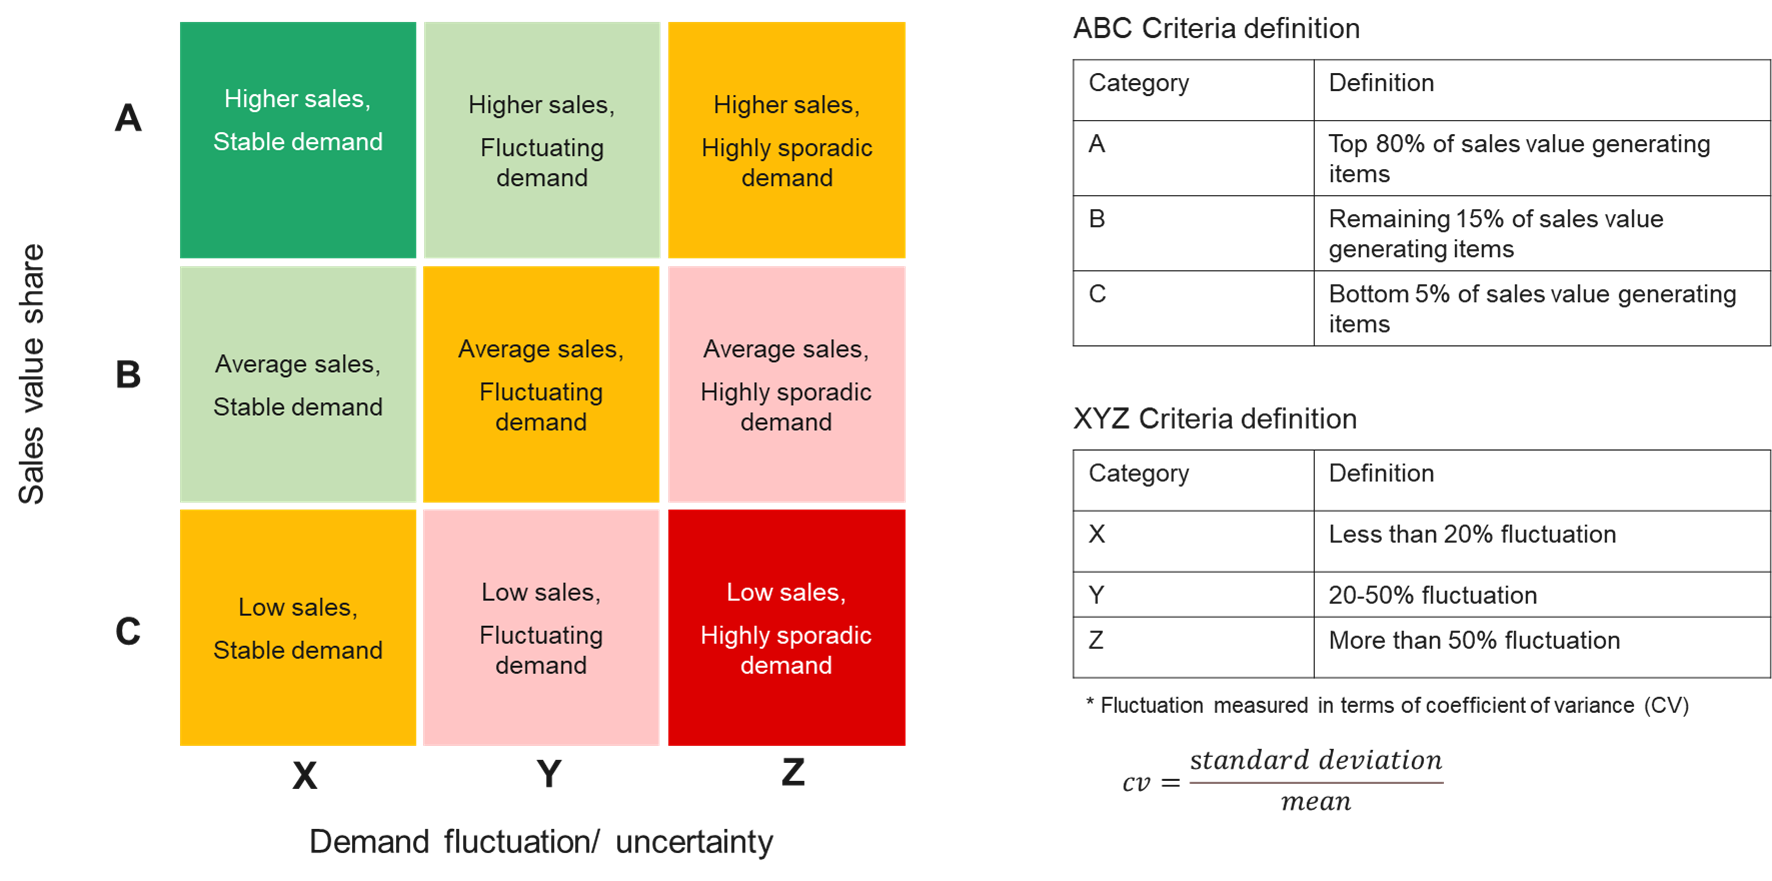

<H2><font color='#048E90'> Let's start the analysis!</font></H2>

In [1]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import plotly.offline as pyo
import random
pyo.init_notebook_mode()

In [3]:
df_sales = pd.read_csv('data\sales_data_2015.csv')
df_sales.head()

Unnamed: 0        item_id store_id        date  year  month  qty  \
0           0  HOBBIES_1_001     CA_1  2015-01-01  2015      1    0   
1           1  HOBBIES_1_001     CA_1  2015-01-02  2015      1    0   
2           2  HOBBIES_1_002     CA_1  2015-01-01  2015      1    0   
3           3  HOBBIES_1_002     CA_1  2015-01-02  2015      1    0   
4           4  HOBBIES_1_003     CA_1  2015-01-01  2015      1    0   

   sell_price  value  
0        8.26    0.0  
1        8.26    0.0  
2        3.97    0.0  
3        3.97    0.0  
4        2.97    0.0

#### 1. Split the data by store 

In [4]:
df_sales_ca1 = df_sales[df_sales['store_id']=='CA_1'].reset_index(drop=True)
df_sales_ca1.head()

Unnamed: 0        item_id store_id        date  year  month  qty  \
0           0  HOBBIES_1_001     CA_1  2015-01-01  2015      1    0   
1           1  HOBBIES_1_001     CA_1  2015-01-02  2015      1    0   
2           2  HOBBIES_1_002     CA_1  2015-01-01  2015      1    0   
3           3  HOBBIES_1_002     CA_1  2015-01-02  2015      1    0   
4           4  HOBBIES_1_003     CA_1  2015-01-01  2015      1    0   

   sell_price  value  
0        8.26    0.0  
1        8.26    0.0  
2        3.97    0.0  
3        3.97    0.0  
4        2.97    0.0

#### 2. Prepare time series data (by week)

In [5]:
# Add week number
df_sales_ca1['week']=pd.to_datetime(df_sales_ca1['date']).dt.strftime('%W')
df_sales_ca1.head()

Unnamed: 0        item_id store_id        date  year  month  qty  \
0           0  HOBBIES_1_001     CA_1  2015-01-01  2015      1    0   
1           1  HOBBIES_1_001     CA_1  2015-01-02  2015      1    0   
2           2  HOBBIES_1_002     CA_1  2015-01-01  2015      1    0   
3           3  HOBBIES_1_002     CA_1  2015-01-02  2015      1    0   
4           4  HOBBIES_1_003     CA_1  2015-01-01  2015      1    0   

   sell_price  value week  
0        8.26    0.0   00  
1        8.26    0.0   00  
2        3.97    0.0   00  
3        3.97    0.0   00  
4        2.97    0.0   00

In [8]:
# Get the weekly sales volume timeseries
df_sales_ca1_volume = pd.pivot_table(df_sales_ca1,index=['item_id'],values=['qty'],
                                    columns=['week'],aggfunc={'qty':np.sum}).reset_index()
df_sales_ca1_volume.head()

item_id   qty                                                     \
week                 00    01    02    03    04     05     06    07     08   
0     FOODS_1_001   2.0  10.0   1.0   5.0   4.0    2.0   10.0   3.0    2.0   
1     FOODS_1_002   0.0   2.0   4.0   4.0   3.0    6.0    4.0   5.0    1.0   
2     FOODS_1_003   0.0   5.0   3.0   4.0   4.0    5.0    4.0   5.0    1.0   
3     FOODS_1_004  52.0  61.0  59.0  88.0  82.0  116.0  120.0  16.0  113.0   
4     FOODS_1_005   0.0   2.0   4.0   1.0   2.0    0.0    2.0   1.0    1.0   

      ...                                                            
week  ...    43    44    45    46   47   48    49    50    51    52  
0     ...   3.0   3.0   4.0  10.0  6.0  4.0  13.0   3.0   4.0   2.0  
1     ...   0.0   2.0   2.0   3.0  2.0  1.0   5.0   5.0   2.0   3.0  
2     ...   7.0   5.0   3.0   2.0  3.0  5.0   8.0   6.0   0.0   0.0  
3     ...  51.0  34.0  23.0  22.0  9.0  0.0   2.0   0.0  94.0  19.0  
4     ...  13.0   5.0   9.0   7.0  9.0  7.0  12.0  32.0  16.0   4.0  

[5 rows x 54 columns]

In [12]:
col_name = ['item_id', *range(0,53,1)]

In [13]:
df_sales_ca1_volume.columns = col_name
df_sales_ca1_volume.head()

item_id     0     1     2     3     4      5      6     7      8  ...  \
0  FOODS_1_001   2.0  10.0   1.0   5.0   4.0    2.0   10.0   3.0    2.0  ...   
1  FOODS_1_002   0.0   2.0   4.0   4.0   3.0    6.0    4.0   5.0    1.0  ...   
2  FOODS_1_003   0.0   5.0   3.0   4.0   4.0    5.0    4.0   5.0    1.0  ...   
3  FOODS_1_004  52.0  61.0  59.0  88.0  82.0  116.0  120.0  16.0  113.0  ...   
4  FOODS_1_005   0.0   2.0   4.0   1.0   2.0    0.0    2.0   1.0    1.0  ...   

     43    44    45    46   47   48    49    50    51    52  
0   3.0   3.0   4.0  10.0  6.0  4.0  13.0   3.0   4.0   2.0  
1   0.0   2.0   2.0   3.0  2.0  1.0   5.0   5.0   2.0   3.0  
2   7.0   5.0   3.0   2.0  3.0  5.0   8.0   6.0   0.0   0.0  
3  51.0  34.0  23.0  22.0  9.0  0.0   2.0   0.0  94.0  19.0  
4  13.0   5.0   9.0   7.0  9.0  7.0  12.0  32.0  16.0   4.0  

[5 rows x 54 columns]

#### 3. Add key statistics to the data
Here we will add :  Mean, Standard Deviation and Cofficient of Deviation

In [15]:
#Add the week column names to a list
cols = df_sales_ca1_volume.columns.tolist()
periods = cols[1:54]

In [19]:
# Add parameters 
df_sales_ca1_volume['total_demand'] = df_sales_ca1_volume[periods].sum(axis=1)
df_sales_ca1_volume['mean'] = df_sales_ca1_volume[periods].mean(axis=1)
df_sales_ca1_volume['std'] = df_sales_ca1_volume[periods].std(axis=1)
df_sales_ca1_volume['cv'] = (df_sales_ca1_volume['std']/df_sales_ca1_volume['mean'])*100

In [20]:
df_sales_ca1_volume.head()

item_id     0     1     2     3     4      5      6     7      8  ...  \
0  FOODS_1_001   2.0  10.0   1.0   5.0   4.0    2.0   10.0   3.0    2.0  ...   
1  FOODS_1_002   0.0   2.0   4.0   4.0   3.0    6.0    4.0   5.0    1.0  ...   
2  FOODS_1_003   0.0   5.0   3.0   4.0   4.0    5.0    4.0   5.0    1.0  ...   
3  FOODS_1_004  52.0  61.0  59.0  88.0  82.0  116.0  120.0  16.0  113.0  ...   
4  FOODS_1_005   0.0   2.0   4.0   1.0   2.0    0.0    2.0   1.0    1.0  ...   

    47   48    49    50    51    52  total_demand       mean        std  \
0  6.0  4.0  13.0   3.0   4.0   2.0         231.0   4.358491   2.767214   
1  2.0  1.0   5.0   5.0   2.0   3.0         158.0   2.981132   1.726385   
2  3.0  5.0   8.0   6.0   0.0   0.0         254.0   4.792453   2.891356   
3  9.0  0.0   2.0   0.0  94.0  19.0        4329.0  81.679245  47.319200   
4  9.0  7.0  12.0  32.0  16.0   4.0         362.0   6.830189   5.931454   

          cv  
0  63.490197  
1  57.910395  
2  60.331453  
3  57.932954  
4  86.841732  

[5 rows x 58 columns]

#### 4. Add XYZ categories based on CV

In [21]:
# xyz thresholds
X = 25
Y = 50

In [22]:
df_sales_ca1_volume['xyz'] = df_sales_ca1_volume['cv'].apply(lambda x: (x < X and "X") or (x < Y and "Y") or "Z")
df_sales_ca1_volume.head()

item_id     0     1     2     3     4      5      6     7      8  ...  \
0  FOODS_1_001   2.0  10.0   1.0   5.0   4.0    2.0   10.0   3.0    2.0  ...   
1  FOODS_1_002   0.0   2.0   4.0   4.0   3.0    6.0    4.0   5.0    1.0  ...   
2  FOODS_1_003   0.0   5.0   3.0   4.0   4.0    5.0    4.0   5.0    1.0  ...   
3  FOODS_1_004  52.0  61.0  59.0  88.0  82.0  116.0  120.0  16.0  113.0  ...   
4  FOODS_1_005   0.0   2.0   4.0   1.0   2.0    0.0    2.0   1.0    1.0  ...   

    48    49    50    51    52  total_demand       mean        std         cv  \
0  4.0  13.0   3.0   4.0   2.0         231.0   4.358491   2.767214  63.490197   
1  1.0   5.0   5.0   2.0   3.0         158.0   2.981132   1.726385  57.910395   
2  5.0   8.0   6.0   0.0   0.0         254.0   4.792453   2.891356  60.331453   
3  0.0   2.0   0.0  94.0  19.0        4329.0  81.679245  47.319200  57.932954   
4  7.0  12.0  32.0  16.0   4.0         362.0   6.830189   5.931454  86.841732   

   xyz  
0    Z  
1    Z  
2    Z  
3    Z  
4    Z  

[5 rows x 59 columns]

#### 5.Prepare summary statistics

In [23]:
df_xyz_summary = pd.pivot_table(df_sales_ca1_volume, index=['xyz'], values=['item_id'],
                               aggfunc={'item_id':np.count_nonzero}).reset_index()
df_xyz_summary

xyz  item_id
0   X       38
1   Y      686
2   Z     2323

In [25]:
fig_xyz_summary = px.scatter(df_sales_ca1_volume, x="mean", y="std",color='xyz',size='total_demand',title='Mean and Standard Deviation of XYZ items',hover_data=['item_id'],template='presentation')
fig_xyz_summary.show()

<H2><font color='#048E90'> Let's perform ABC and XYZ together</font></H2>

In [26]:
# Function for ABC analysis
def abc_analysis_by_store(df,store, a, b):
    #split the store data from main dataframe
    df_storei = df[df['store_id']==store]
    
    #Caclculate the value for each item in the perticular store
    df_storei = df_storei.groupby(['item_id'],as_index=False)['value'].sum()
    
    #Sort the values in descending order
    df_storei = df_storei.sort_values(by=['value'],ascending=False).reset_index(drop=True)
    
    #Calculate the percentage share by item
    df_storei['perc'] = df_storei.value/df_storei['value'].sum()*100
    
    #Calculate the cumulative percentage share
    df_storei['cumu'] = df_storei['perc'].cumsum()
    
    #Add ABC categories based on predefined rules
    df_storei['abc'] = df_storei['cumu'].apply(lambda x: (x <= a and "A") or (x <= a + b and "B") or "C")
    
    #Calculate summary statistics
    df_abc_summary = pd.pivot_table(df_storei, index=['abc'], values=['perc', 'value', 'item_id'], 
                                aggfunc={'perc': np.sum, 'value': np.sum, 'item_id': np.count_nonzero}).reset_index()
    
    df_abc_summary['item_perc'] = df_abc_summary.item_id/df_abc_summary['item_id'].sum()*100
    
    return df_storei, df_abc_summary

#### 6. Lets convert XYZ analysis into a python function

In [28]:
def xyz_analysis_by_store(df,store,x,y):
    #split by store
    df1 = df[df['store_id']==store].reset_index(drop=True)
    
    #Add the week number
    df1['week']=pd.to_datetime(df1['date']).dt.strftime('%W')
    
    # Get weekly sales volume timeseries
    df2 = pd.pivot_table(df1,index=['item_id'], values=['qty'],columns=['week'],
                               aggfunc={'qty':np.sum}).reset_index()
    
    # Rename columns to convert the pivot table structure
    col_name = ['item_id',*range(0,53,1)]
    df2.columns = col_name
    
    # Tranform timeseries data for visualization 
    df_t = pd.melt(df2, id_vars=['item_id'],var_name='week',value_name='qty' )
    
    #Add the week columbs names to a list
    periods = col_name[1:54]
    
    # Add parameters
    df2['total_demand'] = df2[periods].sum(axis=1)
    df2['mean'] = df2[periods].mean(axis=1)
    df2['std'] = df2[periods].std(axis=1)
    df2['cv'] = (df2['std']/df2['mean'])*100
    
    # Add xyz categories
    df2['xyz'] = df2['cv'].apply(lambda x:(x < X and "X") or (x < Y and "Y") or "Z")
    
    # Add summary 
    df_xyz_summary = pd.pivot_table(df2, index=['xyz'], values=['item_id'],
                               aggfunc={'item_id':np.count_nonzero}).reset_index()
    
    return df2, df_xyz_summary, df_t
    
    

In [29]:
# Run the XYZ function
df_xyz_ca1, df_xyz_ca1_summary, df_ca1_t = xyz_analysis_by_store(df_sales,'CA_1',25,50)


In [30]:
df_xyz_ca1_summary

xyz  item_id
0   X       38
1   Y      686
2   Z     2323

#### 7. Lets run ABC and XYZ together

In [31]:
def abc_and_xyz(df,store,a,b,x,y):
    # Run abc function
    df_abc, df_abc_summary = abc_analysis_by_store(df,store, a, b)
    # Run xyz function
    df_xyz, df_xyz_summary, df_xyz_t = xyz_analysis_by_store(df,store,x,y)
    
    #Lets merge both abc and xyz
    df_segment = pd.merge(df_abc,df_xyz[['item_id','total_demand','mean','std','cv','xyz']],
                         left_on='item_id',right_on='item_id').reset_index(drop=True)
    
    df_segment['category'] = df_segment['abc']+df_segment['xyz']
    
    df_segment_summary = pd.pivot_table(df_segment,index=['category','abc','xyz'], values=['value','item_id'],
                               aggfunc={'value':np.sum, 'item_id':np.count_nonzero}).reset_index()
    
    df_segment_summary.rename(columns = {'item_id':'number_of_items'}, inplace = True)
    
    return df_segment, df_segment_summary, df_abc, df_abc_summary, df_xyz, df_xyz_summary, df_xyz_t

In [35]:
df_segment, df_segment_summary, df_abc, df_abc_summary, df_xyz, df_xyz_summary, df_xyz_t = abc_and_xyz(df_sales,'CA_1',80, 15, 25,50)

In [36]:
df_segment.head()

item_id     value      perc      cumu abc  total_demand        mean  \
0    FOODS_3_120  76731.84  1.517013  1.517013   A       15408.0  290.716981   
1  HOBBIES_1_354  50085.00  0.990197  2.507210   A        2200.0   41.509434   
2  HOBBIES_1_158  35963.70  0.711014  3.218224   A        1565.0   29.528302   
3    FOODS_3_586  27486.48  0.543417  3.761640   A       16361.0  308.698113   
4    FOODS_3_090  27414.60  0.541995  4.303636   A       18482.0  348.716981   

          std         cv xyz category  
0  119.788656  41.204561   Y       AY  
1   12.311069  29.658483   Y       AY  
2   12.520143  42.400486   Y       AY  
3   63.008420  20.411016   X       AX  
4  208.463738  59.780208   Z       AZ

In [37]:
df_segment_summary

category abc xyz  number_of_items       value
0       AX   A   X               38   342405.75
1       AY   A   Y              566  2026614.57
2       AZ   A   Z              643  1677123.35
3       BY   B   Y              113   103447.57
4       BZ   B   Z              815   655330.98
5       CY   C   Y                7     3050.96
6       CZ   C   Z              865   250113.34

#### 8. Visualize the results

In [38]:
fig_summary_bar = px.bar(df_segment_summary, x='xyz',color='xyz',y='value',barmode='group',
                         facet_col='abc',template='presentation')
fig_summary_bar.show()

In [39]:
fig_scatter = px.scatter(df_segment, x="cumu", y="cv",color='category',template='presentation')
fig_scatter.show()

#### Samples from each category and the demand patter

#### STEPS here...
1. Pick random items under each category (AX, AY, etc.)
2. Get the weekly demand data for each of the selected items
3. Map demand patterns of each item in a chart
4. Put it all together in a grid
5. Add mean line
6. Add rectancle to show +25% to -25% from mean






In [50]:
def plot_charts_for_random_item_in_each_category(df_segment, df_xyz_t):
    categories = ['AX','AY','AZ','BX','BY','BZ','CX','CY','CZ']
    item = []
    frames = []
    mean = []
    
    # loop through each of the categories
    for i in categories:
        if len(df_segment[df_segment['category']==i]['item_id'].unique().tolist())>0:
            item = random.choice(df_segment[df_segment['category']==i]['item_id'].unique().tolist())
            df = df_xyz_t[df_xyz_t['item_id']==item]
            df['category'] = i
            frames.append(df)
            mean.append(df['qty'].mean())
            
        else:
            df_empty = pd.DataFrame(data={'item_id':'','week':'','qty':'','category':i},index=[0])
            frames.append(df_empty)
            mean.append(0)
            
    df_output = pd.concat(frames).reset_index(drop=True)
    
    # Let's draw the charts
    fig = px.line(df_output, x ='week',y='qty', facet_col='category', facet_col_wrap=3,
                 category_orders ={'category':['AX','AY','AZ','BX','BY','BZ','CX','CY','CZ']},template='plotly_white')
    
    
    # Add mean line and the rectancle to show -25% to +25% of the mean value
    k = 0
    for r in range(3):
        for c in range(1,4):
            row = 3-r
            col = c
            mean_value = mean[k]
            k = k + 1
            fig.add_hline(y=mean_value, line_dash="dot", row=row, col=col,annotation_text="mean",annotation_position="bottom right")
            fig.add_hrect(y0=mean_value*0.75,y1=mean_value*1.25,fillcolor="green", opacity=0.10, line_width=0,row=row, col=col)
            
    # Add box plot chart
    fig_box_plot = px.box(df_output, x="category", y="qty", color="category",template='presentation')
    fig_box_plot.update_layout(xaxis={'categoryorder':'category ascending'})
    
    
    return df_output, fig, fig_box_plot
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [51]:
df_output, fig_category_example, fig_box_plot = plot_charts_for_random_item_in_each_category(df_segment, df_xyz_t)

<ipython-input-50-2129696ddcbc>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
fig_category_example.show()

In [53]:
fig_box_plot.show()